In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio as rio
import xarray as xrr
import xdem
import pyproj

In [3]:
%matplotlib inline

In [58]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_methow/notebooks


In [109]:
dummy_fn = '../../data/lidar/methow/dtm/raw/intermediate_files/methow_basin_2018_dtm_9_m_copy.tif'

In [110]:
dummy_dem = xdem.DEM(dummy_fn)

In [111]:
dummy_dem.vcrs

<Vertical CRS: EPSG:5703>
Name: NAVD88 height
Axis Info [vertical]:
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Vertical Datum 1988
- Ellipsoid: undefined
- Prime Meridian: undefined

### Trial 1

In [169]:
asp_4269_fn = '../../data/lidar/methow/dtm/raw/intermediate_files/methow_basin_2018_dtm_9_m_5498-adj.tif'

In [170]:
asp_4269 = xdem.DEM(asp_4269_fn)

In [171]:
pyproj.CRS(asp_4269.crs)

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [175]:
asp_4269.vcrs

In [173]:
# asp_4269.set_vcrs("Ellipsoid")

In [174]:
# pyproj.CRS(asp_4269.crs)

In [146]:
asp_4269.vcrs

'Ellipsoid'

In [168]:
asp_4269.to_vcrs(4979)

/Users/Hannah/opt/miniconda3/envs/xdem_2023/lib/python3.11/site-packages/xdem/dem.py:272: UserWarning: Source and destination vertical CRS are the same, skipping vertical transformation.
  warnings.warn(


## Trial 2

In [176]:
xdem_4269_fn = '../../data/lidar/methow/dtm/raw/intermediate_files/methow_basin_2018_dtm_9_m_5498.tif'

In [177]:
xdem_4269 = xdem.DEM(xdem_4269_fn)

In [164]:
# pyproj.CRS("EPSG:5498").to_3d 

In [149]:
pyproj.CRS(xdem_4269.crs)

<Compound CRS: EPSG:5498>
Name: NAD83 + NAVD88 height
Axis Info [ellipsoidal|vertical]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83
- NAVD88 height

In [152]:
xdem_4269.set_vcrs(xdem_4269.vcrs)

In [165]:
pyproj.CRS(xdem_4269.vcrs)

<Vertical CRS: EPSG:5703>
Name: NAVD88 height
Axis Info [vertical]:
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Vertical Datum 1988
- Ellipsoid: undefined
- Prime Meridian: undefined

In [156]:
xdem_4269.to_vcrs('Ellipsoid')

In [157]:
pyproj.CRS(xdem_4269.crs)

<Compound CRS: EPSG:5498>
Name: NAD83 + NAVD88 height
Axis Info [ellipsoidal|vertical]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83
- NAVD88 height

# Trial 3

In [204]:
xdem_4269_fn = '../../data/lidar/methow/dtm/raw/intermediate_files/methow_basin_2018_dtm_9_m_utm_26910.tif'

In [205]:
xdem_4979 = xdem.DEM(xdem_4269_fn)

In [207]:
xdem_4979.vcrs

In [208]:
xdem_4979.set_vcrs(5703)

In [209]:
xdem_4979.vcrs

<Vertical CRS: EPSG:5703>
Name: NAVD88 height
Axis Info [vertical]:
- H[up]: Gravity-related height (metre)
Area of Use:
- name: Mexico - onshore. United States (USA) - CONUS and Alaska - onshore - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (172.42, 14.51, -66.91, 71.4)
Datum: North American Vertical Datum 1988
- Ellipsoid: undefined
- Prime Meridian: undefined

In [210]:
xdem_4979.to_vcrs(4979)

In [226]:
crs = pyproj.CRS(4269).to_3d()

In [227]:
xdem_4979.crs = crs

In [228]:
xdem_4979.vcrs

'Ellipsoid'

In [229]:
# xdem_4979.to_vcrs(crs)

In [230]:
# trial4 = asp_4269 - xdem_4979

In [59]:
lidar_26910_xdem_4979_fn = '../../lidar_26910_xdem_4979.tif'
lidar_26910_xdem_egm96_fn = '../../lidar_26910_xdem_egm96.tif'

In [60]:
lidar_26910_xdem_4979_src = rio.open(lidar_26910_xdem_4979_fn)
lidar_26910_xdem_egm96_src =  rio.open(lidar_26910_xdem_egm96_fn)

In [66]:
dif = lidar_26910_xdem_egm96_src.read(1, masked=True) - lidar_asp

In [68]:
dif2 = lidar_26910_xdem_4979_src.read(1, masked=True) - lidar_asp

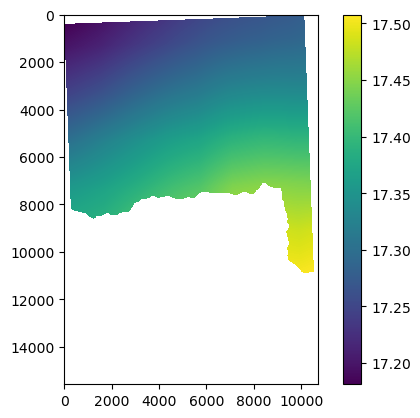

In [67]:
fig, ax = plt.subplots()

c = ax.imshow(dif)
plt.colorbar(c)

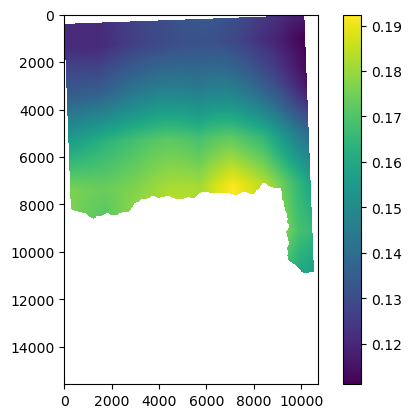

In [69]:
fig, ax = plt.subplots()

c = ax.imshow(dif2)
plt.colorbar(c)

In [63]:
lidar_29610_fn = '../../data/lidar/methow/dtm/raw/methow_basin_2018_dtm_9_m_utm_26910.tif'
lidar_asp_fn = '../../data/lidar/methow/dtm/raw/methow_basin_2018_dtm_9_m_utm_26910-adj.tif'

In [64]:
lidar_29610_src = rio.open(lidar_29610_fn)
lidar_asp_src =  rio.open(lidar_asp_fn)

In [65]:
lidar_29610 = lidar_29610_src.read(1, masked=True)
lidar_asp = lidar_asp_src.read(1, masked=True)

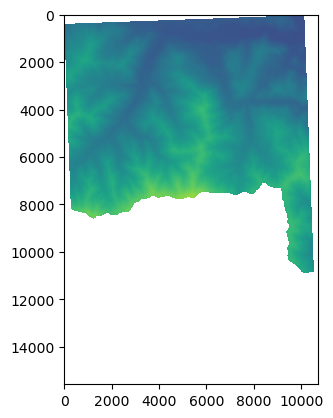

In [10]:
plt.imshow(lidar_29610.read(1, masked=True), vmin=0, vmax=2000)

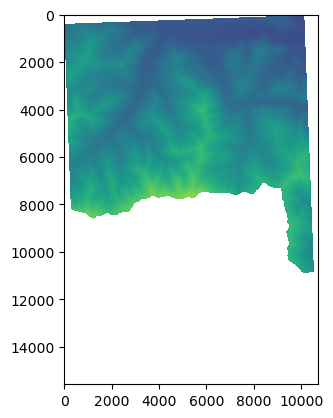

In [11]:
plt.imshow(lidar_asp.read(1, masked=True), vmin=0, vmax=2000)

In [24]:
difference = lidar_29610 - lidar_asp

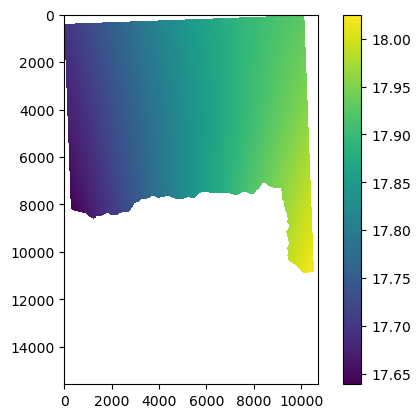

In [25]:
fig, ax = plt.subplots()

c = ax.imshow(difference)
plt.colorbar(c)

In [101]:
lidar_26910_xdem = xdem.DEM(lidar_29610_fn)
lidar_asp_xdem = xdem.DEM(lidar_asp_fn)

In [99]:
lidar_asp_xdem = xdem.DEM(lidar_asp_fn)

In [104]:
lidar_asp_xdem.vcrs

In [103]:
lidar_26910_xdem.vcrs

In [6]:
pyproj.CRS(lidar_26910_xdem.crs)

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
pyproj.CRS(lidar_asp_xdem.crs)

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
print(lidar_26910_xdem.vcrs)

None


In [126]:
lidar_26910_xdem.set_vcrs(5703)

In [127]:
lidar_26910_xdem.vcrs

<Vertical CRS: EPSG:5703>
Name: NAVD88 height
Axis Info [vertical]:
- H[up]: Gravity-related height (metre)
Area of Use:
- name: Mexico - onshore. United States (USA) - CONUS and Alaska - onshore - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (172.42, 14.51, -66.91, 71.4)
Datum: North American Vertical Datum 1988
- Ellipsoid: undefined
- Prime Meridian: undefined

In [128]:
lidar_26910_xdem.to_vcrs("Ellipsoid")

In [131]:
pyproj.CRS(lidar_26910_xdem.crs)

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [125]:
lidar_26910_xdem.vcrs

In [38]:
lidar_26910_xdem.vcrs

'Ellipsoid'

In [29]:
lidar_26910_xdem_egm96 = xdem.DEM(lidar_29610_fn)
lidar_26910_xdem_egm96.set_vcrs(5703)
lidar_26910_xdem_egm96.to_vcrs("EGM96")

In [49]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_methow/notebooks


In [52]:
lidar_26910_xdem_egm96.save('../../lidar_26910_xdem_egm96.tif')

In [53]:
lidar_26910_xdem.save('../../lidar_26910_xdem_4979.tif')

## Test the dem_goid output transformed to 4979 (NAD83)

In [90]:
lidar_26910_xdem_asp_4979 = xdem.DEM(lidar_29610_fn, crs=crs)

TypeError: SatelliteImage.__init__() got an unexpected keyword argument 'crs'

In [81]:
print(lidar_26910_xdem_asp_4979.vcrs)

None


In [79]:
lidar_26910_xdem_asp_4979.crs

CRS.from_epsg(26910)

In [121]:
from pyproj import CRS
crs = CRS('EPSG:4269').to_3d()
print(crs)

GEOGCRS["NAD83",DATUM["North American Datum 1983",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6269]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]],CS[ellipsoidal,3],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]],USAGE[SCOPE["unknown"],AREA["North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massach

In [123]:
crs.ellipsoid

ELLIPSOID["GRS 1980",6378137,298.257222101,
    LENGTHUNIT["metre",1]]

In [97]:
from pyproj import CRS
crs = CRS('EPSG:26910').to_3d()
print(crs)

PROJCRS["NAD83 / UTM zone 10N",BASEGEOGCRS["NAD83",DATUM["North American Datum 1983",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6269]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["UTM zone 10N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-123,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",500000,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]],ID["EPSG",16010]],CS[Cartesian,3],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]],USAGE[SCOPE[

In [98]:
from pyproj import CRS
crs_32610 = CRS('EPSG:32610').to_3d()
print(crs_32610)

PROJCRS["WGS 84 / UTM zone 10N",BASEGEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4979]],CONVERSION["UTM zone 10N",METHOD["Transverse Mercator",ID["EPSG",9807]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",-123,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",0.9996,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",500000,LENGTHUNIT["metre",1],ID["EPS

In [120]:
from pyproj import CRS
crs_4326 = CRS('EPSG:4326').to_3d()
print(crs_4326)

GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,3],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1]],USAGE[SCOPE["Geodesy. Navigation and positioning using GPS satellite system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4979]]


Go to reprojection and instead of 26910, reproject to 5498. Then bring that into xdem and transform to 4979. Then transform to 32610. Then subract that from asp product.

In [96]:
crs2 = 
print(crs2)

None


In [95]:
print(crs)

GEOGCRS["NAD83",DATUM["North American Datum 1983",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ID["EPSG",6269]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]],CS[ellipsoidal,3],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["ellipsoidal height (h)",up,ORDER[3],LENGTHUNIT["metre",1,ID["EPSG",9001]]],USAGE[SCOPE["unknown"],AREA["North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massach

In [112]:
lidar_26910_xdem_asp_4979.set_vcrs('Ellipsoid')

In [118]:
lidar_26910_xdem_asp_4979.vcrs

'Ellipsoid'

In [117]:
pyproj.CRS(lidar_26910_xdem_asp_4979.crs)

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [119]:
lidar_26910_xdem_asp_4979.to_vcrs(4979)

/Users/Hannah/opt/miniconda3/envs/xdem_2023/lib/python3.11/site-packages/xdem/dem.py:272: UserWarning: Source and destination vertical CRS are the same, skipping vertical transformation.
  warnings.warn(


In [ ]:
import rasterio

lidar_dsm = 'ref_dem.tif'

ds = rasterio.open(lidar_dsm)
ds_arr = ds.read(1)

src = rasterio.open(
    'ref_dem_vcrs_corrected.tif',
    'w',
    driver='GTiff',
    height=ds.height,
    width=ds.width,
    count=1,
    dtype=ds_arr.dtype,
    crs=crs.to_wkt(), # use the crs you defined earlier here
    transform=ds.transform,
    nodata=ds.nodata
)

src.write(ds_arr, 1)
src.close()

In [ ]:


lidar_26910_xdem_asp_4979.to_vcrs(4979)

In [31]:
lidar_26910_xdem_egm96.vcrs

<Vertical CRS: EPSG:5773>
Name: EGM96 height
Axis Info [vertical]:
- H[up]: Gravity-related height (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: EGM96 geoid
- Ellipsoid: undefined
- Prime Meridian: undefined

In [36]:
lidar_asp_xdem = xdem.DEM(lidar_asp_fn)

In [46]:
lidar_asp_xdem

DEM(
  data=[[-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        ...
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]]
  transform=| 0.91, 0.00, 703542.87|
            | 0.00,-0.91, 5361964.77|
            | 0.00, 0.00, 1.00|
  crs=EPSG:32610
  nodata=-9999.0)

In [44]:
lidar_asp_xdem.set_vcrs(5703)

In [41]:
lidar_26910_xdem

DEM(
  data=[[-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        ...
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]
        [-- -- -- ... -- -- --]]
  transform=| 0.91, 0.00, 703542.87|
            | 0.00,-0.91, 5361964.77|
            | 0.00, 0.00, 1.00|
  crs=EPSG:26910
  nodata=-9999.0)

In [47]:
difference2 = lidar_26910_xdem - lidar_asp_xdem

ValueError: Both rasters must have the same shape, transform and CRS.

In [48]:
difference3 = lidar_26910_xdem_egm96 - lidar_asp_xdem

ValueError: Both rasters must have the same shape, transform and CRS.

In [52]:
np.nanmean(difference2)

0.15092398

In [55]:
type(lidar_26910_xdem)

xdem.dem.DEM

In [ ]:
fig, ax = plt.subplots()

difference2.show()

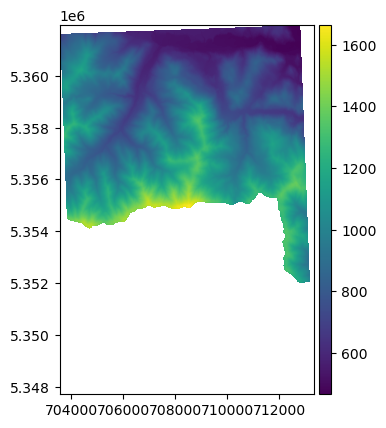

In [33]:
fig, ax = plt.subplots()

lidar_asp_xdem.show()
#plt.colorbar(c)

In [ ]:
fig, ax = plt.subplots()

lidar_asp_xdem.show()

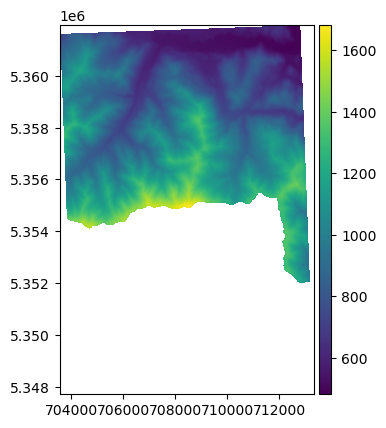

In [34]:
fig, ax = plt.subplots()

lidar_26910_xdem_egm96.show()

In [18]:
np.nanmean(difference3)

17.333221